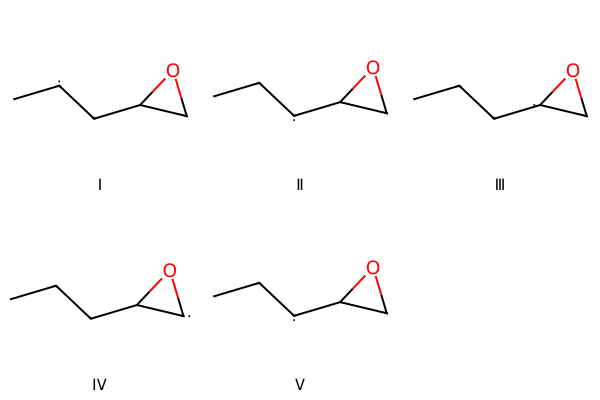

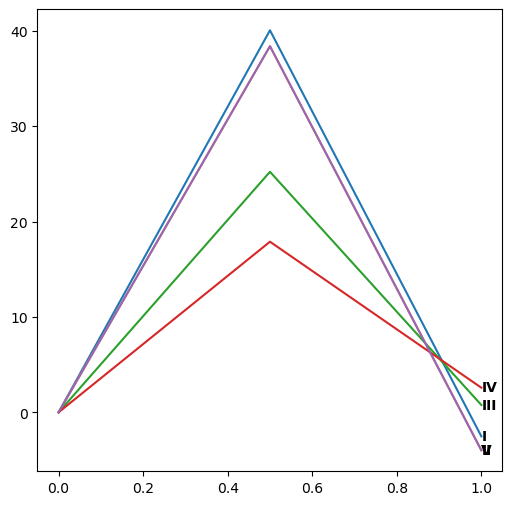

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from PIL import Image
import io

# --- Helper: Integer to Roman Numeral ---
def int_to_roman(n):
    numerals = {
        1: "I", 2: "II", 3: "III", 4: "IV", 5: "V",
        6: "VI", 7: "VII", 8: "VIII", 9: "IX", 10: "X"
    }
    return numerals.get(n, str(n))

# --- Input PES data: (smiles, coordinate, energy) ---
surfaces = {
    "R5 > R4": [("[CH2]CCC1CO1", 0.0, 0.00), ("TS", 0.5, 40.06), ("C[CH]CC1CO1", 1.0, -2.52)],
    "R5 > R3": [("[CH2]CCC1CO1", 0.0, 0.00), ("TS", 0.5, 38.39), ("CC[CH]C1CO1", 1.0, -3.98)],
    "R5 > R2": [("[CH2]CCC1CO1", 0.0, 0.00), ("TS", 0.5, 25.22), ("CCC[C]1CO1", 1.0, 0.77)],
    "R5 > R1": [("[CH2]CCC1CO1", 0.0, 0.00), ("TS", 0.5, 17.89), ("CCCC1[CH]O1", 1.0, 2.58)],
    "Beta Cl": [("[CH2]CCC1CO1", 0.0, 0.00), ("TS", 0.5, 38.39), ("CC[CH]C1CO1", 1.0, -3.98)]
}

fig, ax = plt.subplots(figsize=(6, 6))

for i, (label, pes_data) in enumerate(surfaces.items(), start=1):
    x = [coord for _, coord, _ in pes_data]
    y = [energy for _, _, energy in pes_data]

    roman_label = int_to_roman(i)

    ax.plot(x, y, label=roman_label)
    ax.text(x[-1], y[-1], roman_label, fontsize=10, fontweight='bold', va='center', ha='left')

synSmiles = [pes[-1][0] for pes in surfaces.values()]
synMols = [Chem.MolFromSmiles(smile) for smile in synSmiles]
synLegends = [str(int_to_roman(i + 1)) for i in range(len(synMols))]
MolsToGridImage(mols=synMols, legends=synLegends, molsPerRow=3)
